<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/estudo_das_escalacoes_times_serios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
RODADAS = 33

In [15]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [16]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/escalacoes_times_serios_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EQUIPE     1584 non-null   object 
 1   RODADA     1584 non-null   object 
 2   JOGADOR    1584 non-null   object 
 3   POSIÇÃO    1584 non-null   object 
 4   PONTUAÇÃO  1584 non-null   float64
 5   CAPITÃO    1584 non-null   object 
 6   TIME       1579 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.8+ KB


**TRATAMENTO DOS DADOS**

Tornando 'RODADA' um número inteiro:

In [17]:
rodadas = list(df['RODADA'])
numero_rodada = [int(rodada.replace('RODADA', '')) for rodada in rodadas]
df.RODADA = numero_rodada
df.head()

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
0,Gigante de JF,33,RICHARD,GOLEIRO,-4.2,NÃO,CEARÁ
1,Gigante de JF,33,CALEGARI,LATERAL,5.8,NÃO,FLUMINENSE
2,Gigante de JF,33,GUILHERME ARANA,LATERAL,12.6,NÃO,ATLÉTICO MINEIRO
3,Gigante de JF,33,LUCCAS CLARO,ZAGUEIRO,5.6,NÃO,FLUMINENSE
4,Gigante de JF,33,JÚNIOR ALONSO,ZAGUEIRO,4.6,NÃO,ATLÉTICO MINEIRO


Checando se há escalado sem time:

In [18]:
df.loc[df.TIME == '']

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME


Não há!

Tirando o dobro da pontuação dos capitães para não enviesar as análises:

In [19]:
df.loc[df['CAPITÃO'] == 'SIM']

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
7,Gigante de JF,33,VINA,MEIA,8.0,SIM,CEARÁ
22,Gigante de JF,32,MARINHO,ATACANTE,30.2,SIM,SANTOS
33,Gigante de JF,31,CLAUDINHO,ATACANTE,46.4,SIM,BRAGANTINO
44,Gigante de JF,30,MARINHO,ATACANTE,24.4,SIM,SANTOS
57,Gigante de JF,29,BRENNER,ATACANTE,9.6,SIM,SÃO PAULO
...,...,...,...,...,...,...,...
1532,Unichampions,5,GREGORE,MEIA,-4.4,SIM,BAHIA
1545,Unichampions,4,JÔ,ATACANTE,14.2,SIM,CORINTHIANS
1558,Unichampions,3,ÉLBER,ATACANTE,18.6,SIM,BAHIA
1566,Unichampions,2,IGOR GOMES,MEIA,-4.2,SIM,SÃO PAULO


In [20]:
def tira_dobro(x):
  return x/2

In [21]:
df['PONTUAÇÃO'].loc[df['CAPITÃO'] == 'SIM'] = list(map(tira_dobro, list(df['PONTUAÇÃO'].loc[df['CAPITÃO'] == 'SIM'])))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
df.loc[df['CAPITÃO'] == 'SIM']

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
7,Gigante de JF,33,VINA,MEIA,4.0,SIM,CEARÁ
22,Gigante de JF,32,MARINHO,ATACANTE,15.1,SIM,SANTOS
33,Gigante de JF,31,CLAUDINHO,ATACANTE,23.2,SIM,BRAGANTINO
44,Gigante de JF,30,MARINHO,ATACANTE,12.2,SIM,SANTOS
57,Gigante de JF,29,BRENNER,ATACANTE,4.8,SIM,SÃO PAULO
...,...,...,...,...,...,...,...
1532,Unichampions,5,GREGORE,MEIA,-2.2,SIM,BAHIA
1545,Unichampions,4,JÔ,ATACANTE,7.1,SIM,CORINTHIANS
1558,Unichampions,3,ÉLBER,ATACANTE,9.3,SIM,BAHIA
1566,Unichampions,2,IGOR GOMES,MEIA,-2.1,SIM,SÃO PAULO


In [23]:
df.head(12)

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
0,Gigante de JF,33,RICHARD,GOLEIRO,-4.20,NÃO,CEARÁ
1,Gigante de JF,33,CALEGARI,LATERAL,5.80,NÃO,FLUMINENSE
2,Gigante de JF,33,GUILHERME ARANA,LATERAL,12.60,NÃO,ATLÉTICO MINEIRO
3,Gigante de JF,33,LUCCAS CLARO,ZAGUEIRO,5.60,NÃO,FLUMINENSE
4,Gigante de JF,33,JÚNIOR ALONSO,ZAGUEIRO,4.60,NÃO,ATLÉTICO MINEIRO
5,Gigante de JF,33,EDENÍLSON,MEIA,9.80,NÃO,INTERNACIONAL
6,Gigante de JF,33,HYORAN,MEIA,6.70,NÃO,ATLÉTICO MINEIRO
7,Gigante de JF,33,VINA,MEIA,4.00,SIM,CEARÁ
8,Gigante de JF,33,EDUARDO SASHA,ATACANTE,1.80,NÃO,ATLÉTICO MINEIRO
9,Gigante de JF,33,CANO,ATACANTE,1.50,NÃO,VASCO


In [41]:
times = np.unique(list(df['TIME']))
vezes_que_aparece_no_df = []
for time in times[:-1]:
  vezes_que_aparece_no_df.append(df['TIME'].loc[df.TIME == time].count())

times_vezes = []
for i in range(len(times[:-1])):
  time_vez = (times[i], vezes_que_aparece_no_df[i])
  times_vezes.append(time_vez)

In [46]:
t_v_em_ordem = sorted(times_vezes, reverse=True, key=lambda tup: tup[1])

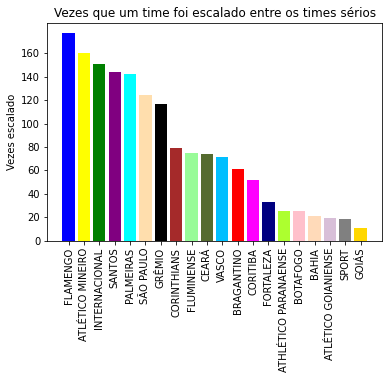

In [50]:
#tirando_a_tupla_de_t_v
t = []
v = []
for i in range(len(t_v_em_ordem)):
  t.append(t_v_em_ordem[i][0])
  v.append(t_v_em_ordem[i][1])

plt.ylabel('Vezes escalado')
N = len(t)
ind = np.arange(N)
plt.xticks(ind, t, rotation='vertical')
plt.yticks(np.arange(0, max(v)+2, 20))
plt.title('Vezes que um time foi escalado entre os times sérios')
plt.bar(t, v, color=['blue', 'yellow', 'green', 'purple',
                     'aqua', 'navajowhite', 'black', 'brown',
                     'palegreen', 'darkolivegreen', 'deepskyblue', 'red',
                     'magenta', 'navy', 'greenyellow', 'pink',
                     'peachpuff', 'thistle', 'grey', 'gold'])
plt.show()

In [55]:
capitaes = np.unique(list(df['JOGADOR'].loc[df['CAPITÃO'] == 'SIM']))

vezes_capitao = []
for capitao in capitaes:
  vezes_capitao.append((capitao, df['JOGADOR'].loc[(df['JOGADOR'] == capitao) & 
                                                   (df['CAPITÃO'] == 'SIM')].count()))

In [56]:
vezes_capitao = sorted(vezes_capitao, reverse=True, key=lambda tup: tup[1])

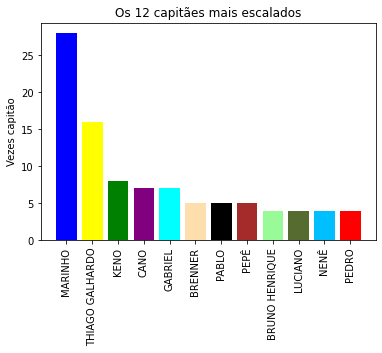

In [59]:
cap = []
vez = []
for i in range(len(vezes_capitao)):
  cap.append(vezes_capitao[i][0])
  vez.append(vezes_capitao[i][1])

plt.ylabel('Vezes capitão')
N = len(cap[:12])
ind = np.arange(N)
plt.xticks(ind, cap[:12], rotation='vertical')
plt.yticks(np.arange(0, max(vez[:12])+2, 5))
plt.title('Os 12 capitães mais escalados')
plt.bar(cap[:12], vez[:12], color=['blue', 'yellow', 'green', 'purple',
                     'aqua', 'navajowhite', 'black', 'brown',
                     'palegreen', 'darkolivegreen', 'deepskyblue', 'red',
                     'magenta', 'navy', 'greenyellow', 'pink',
                     'peachpuff', 'thistle', 'grey', 'gold'])
plt.show()